In [104]:
import pandas as pd
import numpy as np

from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
from IPython.core.display import display, HTML
import ipywidgets as widgets

C:\Users\StupidDev\AppData\Local\Temp\ipykernel_32004\266605827.py:6: DeprecationWarning:

Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display



In [32]:
# loading data right from the source:
death_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
confirmed_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
recovered_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')
country_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/web-data/data/cases_country.csv')


#nation_df = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/web-data/data/cases_country.csv")

In [33]:
death_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,7896,7896,7896,7896,7896,7896,7896,7896,7896,7896
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,3598,3598,3598,3598,3598,3598,3598,3598,3598,3598
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,6881,6881,6881,6881,6881,6881,6881,6881,6881,6881
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,165,165,165,165,165,165,165,165,165,165
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,1933,1933,1933,1933,1933,1933,1933,1933,1933,1933


In [34]:
confirmed_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,209322,209340,209358,209362,209369,209390,209406,209436,209451,209451
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,334391,334408,334408,334427,334427,334427,334427,334427,334443,334457
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,271441,271448,271463,271469,271469,271477,271477,271490,271494,271496
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,47866,47875,47875,47875,47875,47875,47875,47875,47890,47890
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,105255,105277,105277,105277,105277,105277,105277,105277,105288,105288


In [35]:
recovered_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [36]:
country_df.head()

,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Cases_28_Days,Deaths_28_Days
0,Afghanistan,2023-03-10 13:21:02,33.93911,67.709953,209484,7896,NaN,NaN,538.127222,NaN,NaN,3.769262,4,AFG,680,0.0
1,Albania,2023-03-10 13:21:02,41.15330,20.168300,334457,3598,NaN,NaN,11621.968170,NaN,NaN,1.075774,8,ALB,228,2.0
2,Algeria,2023-03-10 13:21:02,28.03390,1.659600,271496,6881,NaN,NaN,619.132366,NaN,NaN,2.534476,12,DZA,90,0.0
3,Andorra,2023-03-10 13:21:02,42.50630,1.521800,47890,165,NaN,NaN,61981.492267,NaN,NaN,0.344540,20,AND,30,0.0
4,Angola,2023-03-10 13:21:02,-11.20270,17.873900,105288,1933,NaN,NaN,320.352770,NaN,NaN,1.835917,24,AGO,104,2.0


In [37]:
# data cleaning

# renaming the df column names to lowercase
country_df.columns = map(str.lower, country_df.columns)
confirmed_df.columns = map(str.lower, confirmed_df.columns)
death_df.columns = map(str.lower, death_df.columns)
recovered_df.columns = map(str.lower, recovered_df.columns)

In [39]:
# changing province/state to state and country/region to country
confirmed_df = confirmed_df.rename(columns={'province/state': 'state', 'country/region': 'country'})
recovered_df = confirmed_df.rename(columns={'province/state': 'state', 'country/region': 'country'})
death_df = death_df.rename(columns={'province/state': 'state', 'country/region': 'country'})
country_df = country_df.rename(columns={'country_region': 'country'})

In [55]:
sorted_country_df = country_df.sort_values('confirmed', ascending=False).head(10)

In [56]:
sorted_country_df

,country,last_update,lat,long_,confirmed,deaths,recovered,active,incident_rate,people_tested,people_hospitalized,mortality_rate,uid,iso3,cases_28_days,deaths_28_days
186,US,2023-03-10 13:21:02,40.000000,-100.000000,103804263,1123836,NaN,NaN,31506.793974,NaN,NaN,1.082649,840,USA,959794,9451.0
80,India,2023-03-10 13:21:02,20.593684,78.962880,44690738,530779,NaN,NaN,3238.448985,NaN,NaN,1.187671,356,IND,5651,29.0
63,France,2023-03-10 13:21:02,46.227600,2.213700,39866718,166176,NaN,NaN,61098.565402,NaN,NaN,0.416829,250,FRA,106042,618.0
67,Germany,2023-03-10 13:21:02,51.165691,10.451526,38249060,168935,NaN,NaN,45997.289088,NaN,NaN,0.441671,276,DEU,355168,2275.0
24,Brazil,2023-03-10 13:21:02,-14.235000,-51.925300,37085675,699310,NaN,NaN,17447.204607,NaN,NaN,1.885661,76,BRA,170852,1613.0
88,Japan,2023-03-10 13:21:02,36.204824,138.252924,33329551,73046,NaN,NaN,26352.375396,NaN,NaN,0.219163,392,JPN,418671,2804.0
94,"Korea, South",2023-03-10 13:21:02,35.907757,127.766922,30615522,34093,NaN,NaN,59715.252338,NaN,NaN,0.111359,410,KOR,290039,396.0
86,Italy,2023-03-10 13:21:02,41.871900,12.567400,25603510,188322,NaN,NaN,42346.569475,NaN,NaN,0.735532,380,ITA,115344,1050.0
190,United Kingdom,2023-03-10 13:21:02,55.000000,-3.000000,24658705,220721,NaN,NaN,36323.694940,NaN,NaN,0.895104,826,GBR,109608,70.0
147,Russia,2023-03-10 13:21:02,61.524000,105.318800,22086064,388521,NaN,NaN,15134.234916,NaN,NaN,1.759123,643,RUS,350549,989.0


In [57]:
def highlight_col(x):
    r = 'background-color: red'
    p = 'background-color: yellow'
    g = 'background-color: gray'
    temp_df = pd.DataFrame('', index=x.index, columns = x.columns)
    temp_df.iloc[:,4] = p
    temp_df.iloc[:,5] = r
    temp_df.iloc[:,6] = g
    return temp_df
sorted_country_df.style.apply(highlight_col, axis=None)

,country,last_update,lat,long_,confirmed,deaths,recovered,active,incident_rate,people_tested,people_hospitalized,mortality_rate,uid,iso3,cases_28_days,deaths_28_days
186,US,2023-03-10 13:21:02,40.000000,-100.000000,103804263,1123836,nan,nan,31506.793974,nan,nan,1.082649,840,USA,959794,9451.000000
80,India,2023-03-10 13:21:02,20.593684,78.962880,44690738,530779,nan,nan,3238.448985,nan,nan,1.187671,356,IND,5651,29.000000
63,France,2023-03-10 13:21:02,46.227600,2.213700,39866718,166176,nan,nan,61098.565402,nan,nan,0.416829,250,FRA,106042,618.000000
67,Germany,2023-03-10 13:21:02,51.165691,10.451526,38249060,168935,nan,nan,45997.289088,nan,nan,0.441671,276,DEU,355168,2275.000000
24,Brazil,2023-03-10 13:21:02,-14.235000,-51.925300,37085675,699310,nan,nan,17447.204607,nan,nan,1.885661,76,BRA,170852,1613.000000
88,Japan,2023-03-10 13:21:02,36.204824,138.252924,33329551,73046,nan,nan,26352.375396,nan,nan,0.219163,392,JPN,418671,2804.000000
94,"Korea, South",2023-03-10 13:21:02,35.907757,127.766922,30615522,34093,nan,nan,59715.252338,nan,nan,0.111359,410,KOR,290039,396.000000
86,Italy,2023-03-10 13:21:02,41.871900,12.567400,25603510,188322,nan,nan,42346.569475,nan,nan,0.735532,380,ITA,115344,1050.000000
190,United Kingdom,2023-03-10 13:21:02,55.000000,-3.000000,24658705,220721,nan,nan,36323.694940,nan,nan,0.895104,826,GBR,109608,70.000000
147,Russia,2023-03-10 13:21:02,61.524000,105.318800,22086064,388521,nan,nan,15134.234916,nan,nan,1.759123,643,RUS,350549,989.000000


In [58]:
import plotly.express as px

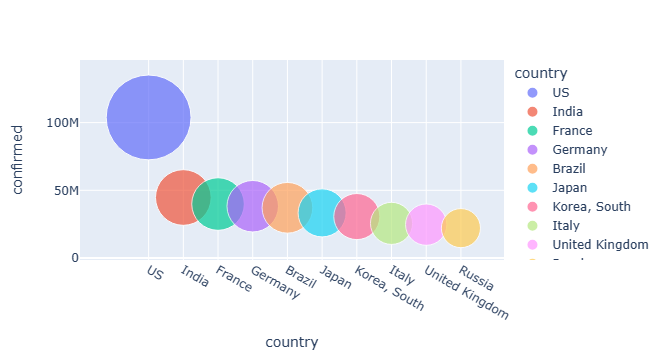

In [60]:
fig = px.scatter(sorted_country_df.head(10), x='country', y='confirmed', size='confirmed',
                color='country', hover_name="country", size_max=60)
fig.update_layout()
fig.show()

In [99]:
import plotly.graph_objects as go

def plot_cases_for_country(country):
    labels = ['confirmed', 'deaths']
    colors = ['blue', 'red']
    mode_size = [6,8]
    line_size = [4, 5]
    
    df_list = [confirmed_df, death_df]
    fig = go.Figure()
    for i, df in enumerate(df_list):
        if country == 'World' or country == 'world':
            x_data = np.array(list(df.iloc[:, 5:].columns))
            y_data = np.sum(np.asarray(df.iloc[:, 5:]), axis=0)
        else:
            x_data = np.array(list(df.iloc[:, 5:].columns))
            y_data = np.sum(np.asarray(df[df['country']==country].iloc[:, 5:]), axis=0)

        fig.add_trace(go.Scatter(x=x_data, y=y_data, mode='lines+markers',
                                name=labels[i],
                                line = dict(color=colors[i], width=line_size[i]),
                                connectgaps=True,
                                text = "Total " + str(labels[i]) + ": "+ str(y_data[-1])))
    fig.show()
#plot_cases_for_country('China')
interact(plot_cases_for_country, country='World');

interactive(children=(Text(value='World', description='country'), Output()), _dom_classes=('widget-interact',)…

In [111]:
import folium

In [113]:
confirmed_df['lat'].fillna(0, inplace=True)
confirmed_df['long'].fillna(0, inplace=True)

world_map = folium.Map(location=[11, 0], tiles="cartodbpositron", zoom_start=2, max_zoom=6, min_zoom=2)

for i in range(len(confirmed_df)):
    folium.Circle(
        location=[confirmed_df.iloc[i]['lat'], confirmed_df.iloc[i]['long']],
        fill=True,
        radius=(int((np.log(confirmed_df.iloc[i,-1] + 1.00001))) + 0.2) * 50000,
        fill_color='blue',
        color='red',
        tooltip = "<div style='margin: 0; background-color: black; color: white;'>"+
                    "<h4 style='text-align:center;font-weight: bold'>"+confirmed_df.iloc[i]['country'] + "</h4>"
                    "<hr style='margin:10px;color: white;'>"+
                    "<ul style='color: white;;list-style-type:circle;align-item:left;padding-left:20px;padding-right:20px'>"+
                        "<li>Confirmed: "+str(confirmed_df.iloc[i,-1])+"</li>"+
                        "<li>Deaths:   "+str(death_df.iloc[i,-1])+"</li>"+
                        "<li>Death Rate: "+ str(np.round(death_df.iloc[i,-1]/(confirmed_df.iloc[i,-1]+1.00001)*100,2))+ "</li>"+
                    "</ul></div>",
    ).add_to(world_map)

world_map

C:\Users\StupidDev\AppData\Local\Temp\ipykernel_32004\334353999.py:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



C:\Users\StupidDev\AppData\Local\Temp\ipykernel_32004\334353999.py:2: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, in

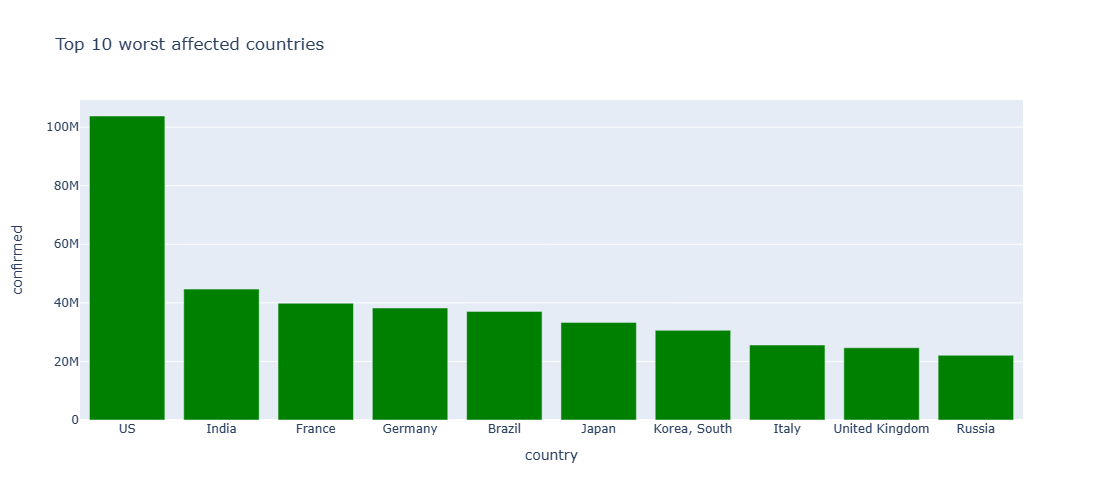

In [116]:
px.bar(
    sorted_country_df.head(10),
    x = "country",
    y = "confirmed",
    title= "Top 10 worst affected countries", # the axis names
    color_discrete_sequence=["green"], 
    height=500,
    width=800
)

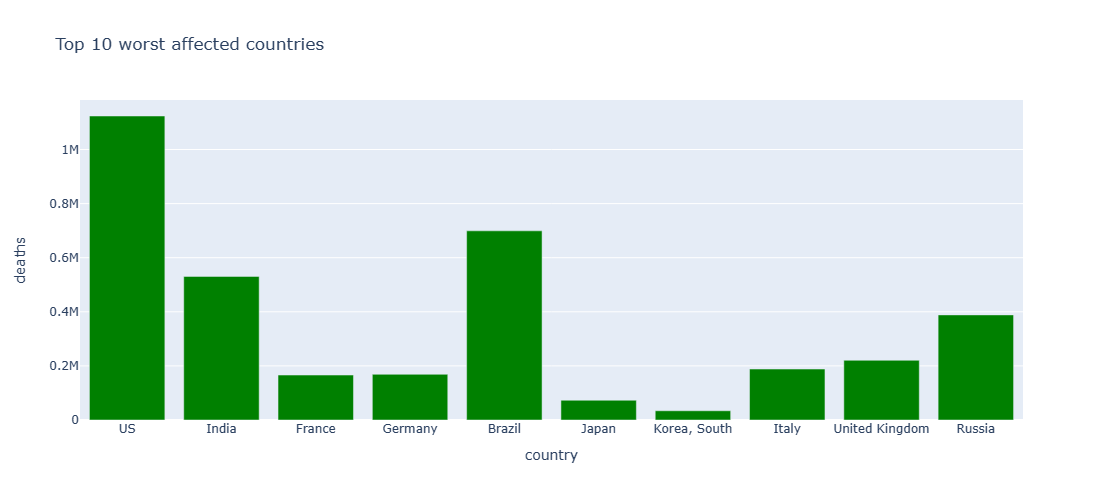

In [117]:
px.bar(
    sorted_country_df.head(10),
    x = "country",
    y = "deaths",
    title= "Top 10 worst affected countries", # the axis names
    color_discrete_sequence=["green"], 
    height=500,
    width=800
)

In [118]:
!pip install voila

   ---------------------------------------- 0.0/3.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/3.9 MB ? eta -:--:--
    --------------------------------------- 0.1/3.9 MB 787.7 kB/s eta 0:00:05
   - -------------------------------------- 0.2/3.9 MB 1.3 MB/s eta 0:00:03
   --- ------------------------------------ 0.3/3.9 MB 1.7 MB/s eta 0:00:03
   ---- ----------------------------------- 0.5/3.9 MB 2.2 MB/s eta 0:00:02
   ------- -------------------------------- 0.7/3.9 MB 2.8 MB/s eta 0:00:02
   -------- ------------------------------- 0.8/3.9 MB 2.6 MB/s eta 0:00:02
   ----------- ---------------------------- 1.1/3.9 MB 3.0 MB/s eta 0:00:01
   ------------ --------------------------- 1.2/3.9 MB 3.0 MB/s eta 0:00:01
   --------------- ------------------------ 1.5/3.9 MB 3.4 MB/s eta 0:00:01
   ----------------- ---------------------- 1.7/3.9 MB 3.5 MB/s eta 0:00:01
   -------------------- ------------------- 2.0/3.9 MB 3.6 MB/s eta 0:00:01
   ---------------------